In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

2023-09-09 12:06:57.601618: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-09 12:06:57.658929: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-09 12:06:58.425840: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
''' train and test path '''
train_path = '/home/deeplearning/brain_tumor_dataset/Training/'
test_path = '/home/deeplearning/brain_tumor_dataset/Testing/'

In [9]:
File=[]
for f in os.listdir(train_path):
    File += [f]

'''  total number of classes '''
print(File)

['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']


In [11]:
''' reading images '''

train_data = []

''' label encoding '''
mapping={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}

count=0

for f in os.listdir(train_path):
    ''' joining path '''
    path = os.path.join(train_path, f)
    for im in os.listdir(path):
        ''' loading an image '''
        img = load_img(os.path.join(path, im), grayscale=False, color_mode='rgb', target_size=(150,150))
        ''' converting an image to array '''
        img = img_to_array(img)
        ''' scaling  '''
        img = img / 255.0
        ''' appending image to train_data '''
        train_data.append([img, count])     
    count=count+1

In [12]:
test_data = []

''' label encoding '''
mapping={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}
count=0

for f in os.listdir(test_path):
    ''' joining path '''
    path=os.path.join(test_path, f)
    for im in os.listdir(path):
        ''' loading an image '''
        img = load_img(os.path.join(path, im), grayscale=False, color_mode='rgb', target_size=(150,150))
        ''' converting an image to array '''
        img = img_to_array(img)
        ''' scaling '''
        img = img/255.0
        ''' appending an image to test_data'''
        test_data.append([img, count])         
    count=count+1

In [13]:
train_images, train_labels = zip(*train_data)
test_images, tese_labels = zip(*test_data)

In [15]:
''' converting labels into to_categorical '''
train_labels = to_categorical(train_labels)

''' coverting train_images into numpy array '''
train_images = np.array(train_images)

''' converting train_labesl into numpy array '''
train_labels = np.array(train_labels)

''' shaep of train_images and train_labels '''
print(train_images.shape)
print(train_labels.shape)

(2870, 150, 150, 3)
(2870, 4)


In [16]:
''' converting labels into to_categorical '''
test_labels = to_categorical(tese_labels)

''' coverting test_images into numpy array '''
test_images = np.array(test_images)

''' converting train_labesl into numpy array '''
test_labels = np.array(test_labels)

''' shaep of test_images and test_labels '''
print(test_images.shape)
print(test_labels.shape)

(394, 150, 150, 3)
(394, 4)


In [17]:
''' reshaping images '''
train_images = train_images.reshape(-1,150,150,3)
test_images = test_images.reshape(-1,150,150,3)

In [19]:
''' train test split '''
X_train, X_test, y_train, y_test = train_test_split(train_images,train_labels, test_size=0.2,random_state=44)

In [20]:
''' shape of X_train, X_test, y_train, y_test '''
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2296, 150, 150, 3)
(574, 150, 150, 3)
(2296, 4)
(574, 4)


In [21]:
''' data Augmentation '''
data_aug = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=20, zoom_range=0.2,
                    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.1, fill_mode="nearest")

In [26]:
model = tf.keras.models.Sequential([
    #first_convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #second_convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #third_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #fourth_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax') 
])

In [23]:
from keras.callbacks import History 
history = History()

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 64)       

In [28]:
History = model.fit(data_aug.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=30,callbacks=[history])

Epoch 1/30


2023-09-09 12:20:50.522517: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-09-09 12:20:50.556618: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x556ce63c2cf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-09 12:20:50.556652: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA L4, Compute Capability 8.9
2023-09-09 12:20:50.650894: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-09 12:20:51.054157: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


72/72 [==============================] - 15s 152ms/step - loss: 1.3188 - accuracy: 0.3489 - val_loss: 1.3099 - val_accuracy: 0.3362
Epoch 2/30
72/72 [==============================] - 11s 149ms/step - loss: 1.1963 - accuracy: 0.4660 - val_loss: 1.0564 - val_accuracy: 0.5871
Epoch 3/30
72/72 [==============================] - 11s 149ms/step - loss: 1.0613 - accuracy: 0.5322 - val_loss: 0.9246 - val_accuracy: 0.6289
Epoch 4/30
72/72 [==============================] - 11s 149ms/step - loss: 0.9679 - accuracy: 0.5893 - val_loss: 0.8890 - val_accuracy: 0.6376
Epoch 5/30
72/72 [==============================] - 11s 148ms/step - loss: 0.9489 - accuracy: 0.5884 - val_loss: 0.9558 - val_accuracy: 0.6115
Epoch 6/30
72/72 [==============================] - 11s 149ms/step - loss: 0.9298 - accuracy: 0.6076 - val_loss: 0.8295 - val_accuracy: 0.6167
Epoch 7/30
72/72 [==============================] - 11s 148ms/step - loss: 0.8841 - accuracy: 0.6150 - val_loss: 0.7996 - val_accuracy: 0.6882
Epoch 8/30

In [29]:
''' prediction '''
y_pred=model.predict(X_test)

''' retreiving max val from predicted values '''
pred = np.argmax(y_pred,axis=1)

''' retreiving max val from actual values '''
ground = np.argmax(y_test,axis=1)

''' classificaion report '''
print(classification_report(ground,pred))

18/18 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.89      0.64      0.74       157
           1       0.68      0.94      0.79        81
           2       0.83      0.56      0.67       170
           3       0.65      0.92      0.76       166

    accuracy                           0.74       574
   macro avg       0.76      0.77      0.74       574
weighted avg       0.78      0.74      0.73       574



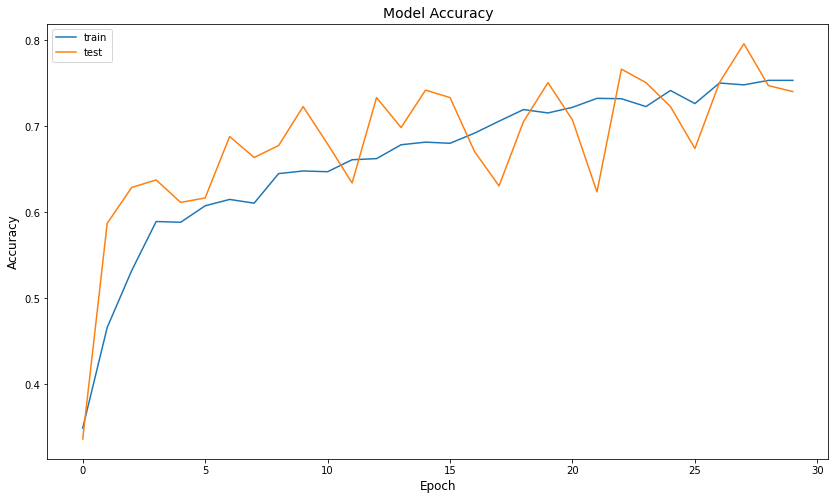

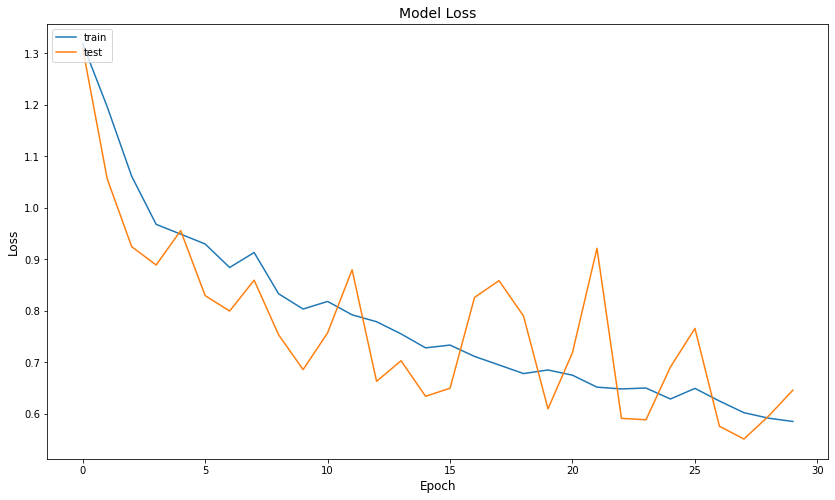

In [31]:
plt.figure(figsize=(14,8))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()